In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
test_img_bgr = cv2.imread("D:\learning_desk\opencv\line_detection_sample.png")

In [5]:
test_img_rgb = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

In [6]:
test_img_gray = cv2.cvtColor(test_img_rgb, cv2.COLOR_RGB2GRAY)

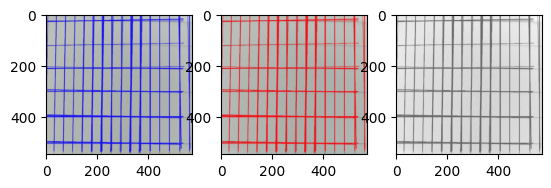

In [7]:
plt.subplot(131)
plt.imshow(test_img_bgr)
plt.subplot(132)
plt.imshow(test_img_rgb)
plt.subplot(133)
plt.imshow(test_img_gray, cmap='gray')

In [8]:
test_img_edges_50_150 = cv2.Canny(test_img_gray, 50, 150, apertureSize=3)
test_img_edges_50_200 = cv2.Canny(test_img_gray, 50, 200, apertureSize=3)
test_img_edges_100_200 = cv2.Canny(test_img_gray, 100, 200, apertureSize=3)

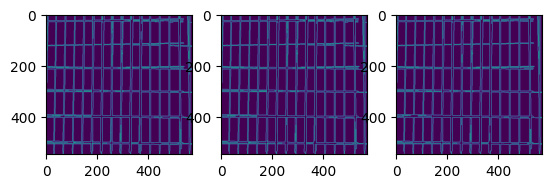

In [9]:
plt.subplot(131)
plt.imshow(test_img_edges_50_150)
plt.subplot(132)
plt.imshow(test_img_edges_50_200)
plt.subplot(133)
plt.imshow(test_img_edges_100_200)

In [10]:
test_img_lines = cv2.HoughLines(test_img_edges_50_150, 1, np.pi/180, 200)

In [11]:
test_img_lines[0]

array([[443.,   0.]], dtype=float32)

In [12]:
for r_theta in test_img_lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = r*a
    y0 = r*b

    x1 = int(x0 + 1000*(-b))
    y1 = int(x0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(x0 - 1000*(a))
    cv2.line(test_img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 5)
    cv2.imwrite('test_img_line_detecd.png', test_img_rgb)

In [13]:
test_img_line_detected = cv2.imread('test_img_line_detecd.png')

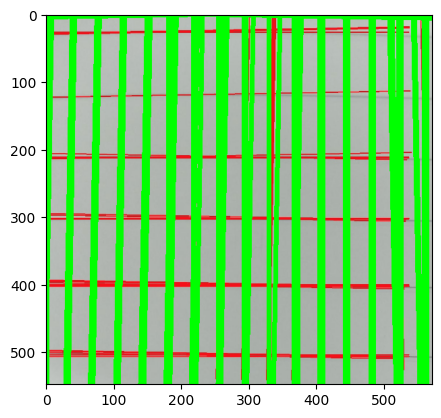

In [14]:
plt.imshow(test_img_line_detected)

Alternate Method

In [15]:
sample2_bgr = cv2.imread('line_detection_sample_1.png')
sample2_gray = cv2.cvtColor(sample2_bgr, cv2.COLOR_BGR2GRAY)

In [16]:
sample_edges = cv2.Canny(sample2_gray, 50, 150, apertureSize=3)

In [20]:
sample_lines = cv2.HoughLinesP(sample_edges,
                              1,
                              np.pi/180,
                              threshold=100,
                              minLineLength=5,
                              maxLineGap=10)

In [24]:
for points in sample_lines:
    x1, y1, x2, y2 = points[0]
    cv2.line(sample2_gray, (x1, y1), (x2, y2), (0,0,255), 5)
    cv2.imwrite('sample2_line_detected.png', sample2_gray)

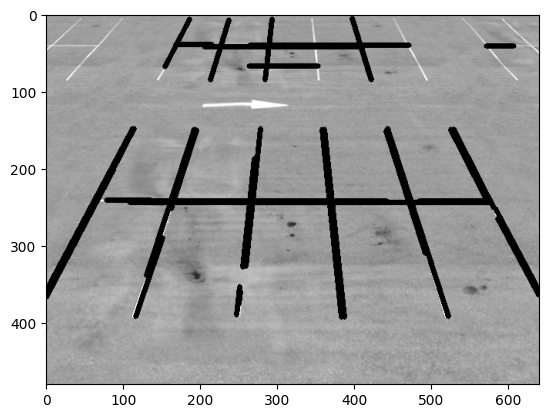

In [25]:
sample2_line_detected = cv2.imread('sample2_line_detected.png')
plt.imshow(sample2_line_detected)